# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
$$
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
$$
$$
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
$$
$$
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
$$

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [12]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

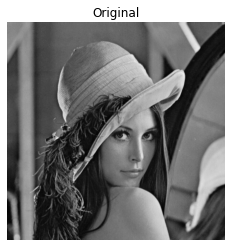

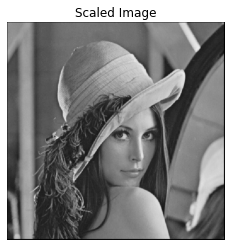

In [31]:
from ainvert import A_invert
import math 

def bicubic(I, vertical, horizontal):
    X, Y = I.shape
    X_new = int(vertical * X)
    Y_new = int(horizontal * Y)
    I_new = np.zeros((X_new, Y_new))
    
    for i in range(1, X_new - 3):
        for j in range(1, Y_new - 3):
            i_new = i / vertical
            j_new = j / horizontal
            
            i1 = math.floor(i_new)
            j1 = math.floor(j_new)
            i2 = i1 + 1
            j2 = j1 + 1

            if i2 >= X:
                i2 = X - 1
            if j2 >= Y:
                j2 = Y - 1
                
            if i1 == i2: 
                i1 -= 1
            if j1 == j2: 
                j1 -= 1
            if i_new > X - 1: 
                i_new -= 1
            if j_new > X - 1: 
                j_new -= 1

            A=I[i1, j1]
            B=I[i1, j2]
            C=I[i2, j1]
            D=I[i2, j2]
                
            Ax = (I[i1 + 1, j1] - I[i1 - 1, j1]) / 2
            Ay = (I[i1, j1 + 1] - I[i1, j1 - 1]) / 2
            Axy = (I[i1 + 1, j1 + 1] -I[i1 - 1, j1] - I[i1, j1 - 1] + I[i1, j1]) / 4
            
            Bx = (I[i1 + 1, j2] - I[i1 - 1, j2]) / 2
            By = (I[i1, j2 + 1] - I[i1, j2 - 1]) / 2
            Bxy = (I[i1 + 1, j2 + 1] - I[i1 - 1, j2] - I[i1, j2 - 1] + I[i1, j2]) / 4
            
            Dx = (I[i2 + 1, j1] - I[i2 - 1, j1]) / 2
            Dy = (I[i2, j1 + 1] - I[i2, j1 - 1]) / 2
            Dxy = (I[i2 + 1, j1 + 1] - I[i2 - 1, j1] - I[i2, j1 - 1] + I[i2, j1]) / 4
            
            Cx = (I[i2 + 1, j2] - I[i2 - 1, j2]) / 2
            Cy = (I[i2, j2 + 1] - I[i2, j2 - 1]) / 2
            Cxy = (I[i2 + 1, j2 + 1] - I[i2 - 1, j2] - I[i2, j2 - 1] + I[i2, j2]) / 4

            x = np.array([[A], [B], [D], [C], [Ax], [Bx], [Dx], [Cx], [Ay], [By], [Dy], [Cy], [Axy], [Bxy], [Dxy], [Cxy]])

            A_ = np.dot(A_invert, x)
            A_ = np.reshape(A_, (4, 4))
            
            for m in range(4):
                for n in range(4):
                    I_new[i][j] += A_[m][n]
    return I_new

img = cv2.imread('../lena.bmp', cv2.COLOR_BGR2GRAY)
img = img.astype('float64')
scaled_image = bicubic(img, 1.25, 1.25)


fig, axs = plt.subplots()
axs.imshow(img, cmap='gray')
axs.set_title('Original')
axs.axis('off')
#save to file
plt.savefig('original.png')
plt.show()

fig, axs = plt.subplots()
axs.imshow(scaled_image, cmap='gray')
axs.set_title('Scaled Image')
axs.axis('off')
#save to file
plt.savefig('scaled_image.png')
plt.show()